A Support Vector Regression is a supervised machine learning algorithm used for classification and regression tasks.SVM works by finding a hyperplane in a high-dimensional space that best separates data intp different classes.It aims to maximize the margin(the distance between th hyperplane and the nearest data points of each class) while minimizing classification errors.SVR can handle both linear and non-linear classification problems by using various kerner functions. It's widely used in tasks such as image classification,text categorization,and more.

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
df=pd.read_csv('Position_Salaries.csv')

In [3]:
print(df.isna().sum())
print('Size of dataset:',df.shape)

Position    0
Level       0
Salary      0
dtype: int64
Size of dataset: (10, 3)


In [4]:
print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


In [6]:
x=df.iloc[:,1:2].values
y=df.iloc[:,-1].values

In [7]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [8]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [9]:
y=y.reshape(len(y),1)

In [10]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# Feature Scaling 

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

sc_y=StandardScaler()
y=sc_y.fit_transform(y)

In [12]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [13]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Training the SVR model on the whole dataset

In [15]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')

regressor.fit(x,y)

C:\Users\Tusha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicting a new result in SVR

In [18]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

# Visualizing the SVR Model

In [19]:
x_inverse=sc_x.inverse_transform(x)
y_inverse=sc_y.inverse_transform(y)

y_pred_inverse=sc_y.inverse_transform(regressor.predict(x).reshape(-1,1))

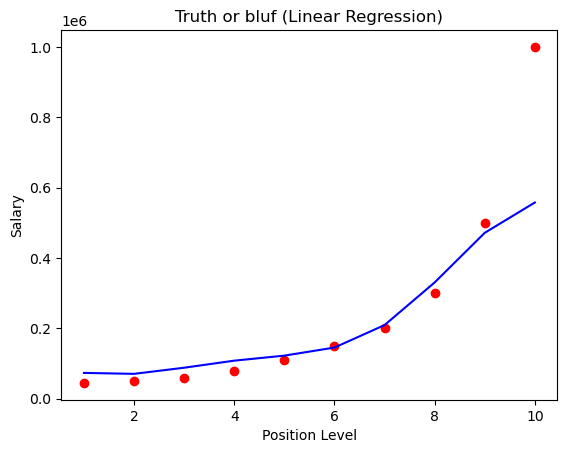

In [20]:
plt.scatter(x_inverse,y_inverse,color='r')
plt.plot(x_inverse,y_pred_inverse,color='b')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.title("Truth or bluf (Linear Regression)")
plt.show()